In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/aviachipta-narxini-bashorat-qilish.zip

Archive:  /content/drive/MyDrive/aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [48]:
train_data = pd.read_csv("/content/train_data.csv",index_col=0)
train_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [52]:
test_dataa = pd.read_csv("/content/test_data.csv",index_col=0)
test_dataa.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 429.7+ KB


In [8]:
train_data['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [12]:
# train_data['stops'] = train_data['stops'].map({'one': 1, 'zero': 0, 'two_or_more': 2})

In [15]:
train_data.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [10]:
#eski dataframe kerak bo'lishi mumkin shuning uchun nusxasini boshqa dataframega saqlab oldim
train_data_num = train_data.copy()

In [11]:
train_data_num.corrwith(train_data['price']).sort_values(ascending=False)

<ipython-input-11-ee89603ef3bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_num.corrwith(train_data['price']).sort_values(ascending=False)


price        1.000000
duration     0.213158
days_left   -0.102545
dtype: float64

In [16]:
a = train_data_num.corrwith(train_data['price']).sort_values(ascending=False)
a[np.abs(a)>0.1]
idn = a[np.abs(a)>0.1].index
idn

<ipython-input-16-799e528b2ae9>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = train_data_num.corrwith(train_data['price']).sort_values(ascending=False)


Index(['price', 'duration', 'days_left'], dtype='object')

In [17]:
a[np.abs(a)>0.1]

price        1.000000
duration     0.213158
days_left   -0.102545
dtype: float64

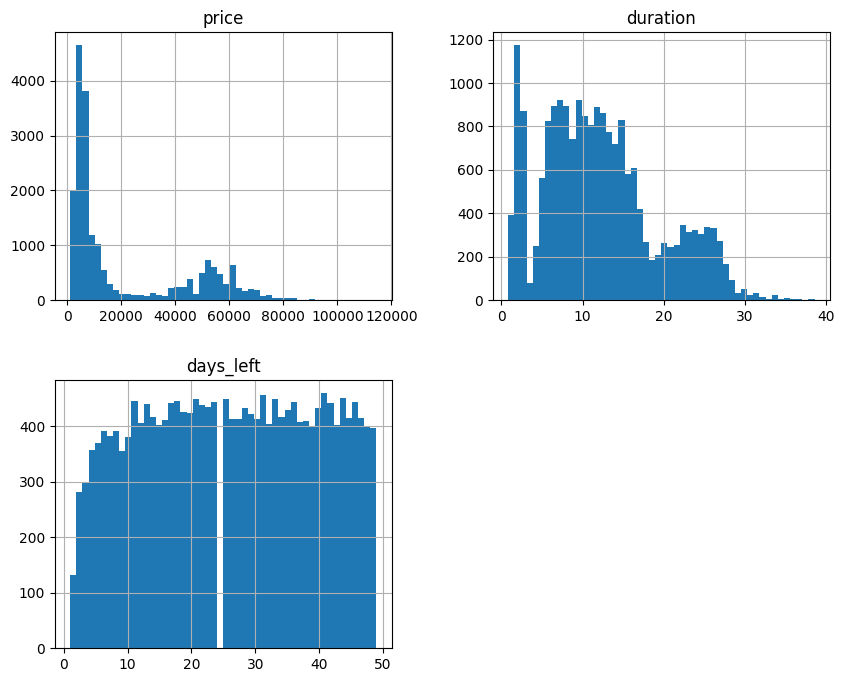

In [21]:
train_data_num[list(idn)].hist(bins=50, figsize=(10,8))
plt.show()

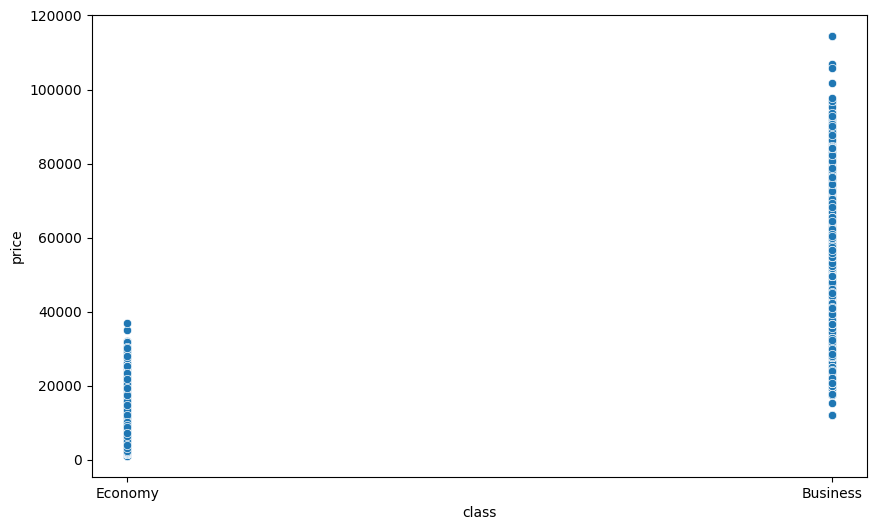

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_data_num, x=train_data_num['class'], y=train_data_num['price'])
plt.show()

In [23]:
train_data.drop('flight',axis=1, inplace=True)
test_data.drop('flight',axis=1, inplace=True)

In [24]:
train_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [25]:
from sklearn.model_selection import train_test_split as tts
train_set , test_set = tts(train_data , test_size = 0.0015 , random_state = 40)

x_train = train_set.drop("price",axis=1)
y = train_set["price"].copy()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# sonli qiymatlarni bir xil oraliqqa tushirib olamiz
num_pipeline = Pipeline([("std_scaler",StandardScaler())])

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19970 entries, 6166 to 11591
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           19970 non-null  object 
 1   source_city       19970 non-null  object 
 2   departure_time    19970 non-null  object 
 3   stops             19970 non-null  object 
 4   arrival_time      19970 non-null  object 
 5   destination_city  19970 non-null  object 
 6   class             19970 non-null  object 
 7   duration          19970 non-null  float64
 8   days_left         19970 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


In [28]:
num = x_train[['days_left','duration']].copy()
number_atribs = list(num)
category_atribs = ["airline","source_city","departure_time","stops","arrival_time" ,"destination_city","class"]

full_pipeline = ColumnTransformer([
    ("number_objects",num_pipeline , number_atribs),
    ("category_objects",OneHotEncoder() , category_atribs)
])

In [29]:
x_prepared = full_pipeline.fit_transform(x_train)

In [30]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor()
RFR_model.fit(x_prepared , y)

RandomForestRegressor()

In [32]:
test_data = x_train.sample(20)
test_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
12844,GO_FIRST,Bangalore,Early_Morning,one,Evening,Kolkata,Economy,11.75,16
19165,Vistara,Chennai,Morning,one,Evening,Kolkata,Business,10.17,42
1633,Air_India,Delhi,Evening,one,Night,Bangalore,Economy,5.00,39
11068,Indigo,Chennai,Evening,one,Late_Night,Delhi,Economy,5.17,49
15632,Indigo,Bangalore,Evening,zero,Evening,Delhi,Economy,2.83,38
16787,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,9.67,42
6765,Vistara,Delhi,Early_Morning,one,Evening,Bangalore,Economy,11.75,42
1333,SpiceJet,Delhi,Early_Morning,one,Early_Morning,Chennai,Economy,24.67,26
6412,Vistara,Chennai,Afternoon,one,Late_Night,Delhi,Economy,12.42,31


In [36]:
label = y.loc[test_data.index]
label

id
12844     6186
19165    54896
1633      4041
11068     3361
15632     4653
16787     5760
6765      4896
1333      4149
6412      4971
18846     2622
1684      6339
6299      2637
2645      6444
12895    19201
9194     41113
14006    55983
17208     4804
4627      5760
11626    44144
1508     56590
Name: price, dtype: int64

In [33]:
test_data_prep = full_pipeline.transform(test_data)
test_data_prep

<20x37 sparse matrix of type '<class 'numpy.float64'>'
	with 180 stored elements in Compressed Sparse Row format>

In [34]:
y_pred = RFR_model.predict(test_data_prep)
y_pred

array([ 6378.17, 54857.01,  4292.96,  3331.43,  4567.85,  6051.39,
        4855.43,  4197.35,  5146.69,  3205.63,  6331.97,  2652.64,
        6297.68, 17896.52, 41382.6 , 55902.91,  4925.99,  5941.29,
       45186.97, 55697.65])

In [37]:
pd.DataFrame({'prediction':y_pred , 'Real value':label})

,prediction,Real value
id,,
12844,6378.17,6186
19165,54857.01,54896
1633,4292.96,4041
11068,3331.43,3361
15632,4567.85,4653
16787,6051.39,5760
6765,4855.43,4896
1333,4197.35,4149
6412,5146.69,4971


In [38]:
x_test = test_set.drop("price",axis=1)
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
12878,Vistara,Chennai,Early_Morning,one,Night,Mumbai,Business,14.33,35
17257,Vistara,Hyderabad,Afternoon,one,Morning,Bangalore,Business,21.83,7
17980,Vistara,Hyderabad,Afternoon,one,Morning,Chennai,Economy,22.92,29
16293,Air_India,Mumbai,Night,one,Night,Chennai,Economy,26.08,3
13380,Indigo,Chennai,Evening,zero,Evening,Bangalore,Economy,1.00,45
17907,Air_India,Kolkata,Afternoon,one,Night,Delhi,Economy,10.75,43
12247,Vistara,Kolkata,Evening,one,Morning,Bangalore,Economy,13.92,33
15484,Vistara,Chennai,Evening,one,Morning,Mumbai,Business,17.75,46
14032,GO_FIRST,Hyderabad,Early_Morning,zero,Morning,Delhi,Economy,2.00,41


In [39]:
y_test = test_set["price"].copy()
y_test

id
12878    64113
17257    49859
17980     6602
16293     9201
13380     1443
17907     5467
12247     8111
15484    64113
14032     2276
10303     6024
16231     6195
6725      1830
16288     4262
4535      6200
16258     2949
12758     1443
10406     8011
11897     3090
2559     58315
1195      1998
8579      4210
17367     7516
17184    15615
6318      4755
13764     2700
11847    50361
12578    69244
6436      2464
1619     60232
16817     6024
Name: price, dtype: int64

In [40]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

def rmse():
        print(np.sqrt(mean_squared_error(y_test , y_pred)))
    print(mean_absolute_error(y_test , y_pred))

In [41]:
x_test_prep = full_pipeline.transform(x_test)

y_pred = RFR_model.predict(x_test_prep)
rmse()

2213.282806568861
1103.7559999999999


In [53]:
t_test_prep = full_pipeline.transform(test_dataa)
t_y_pred = RFR_model.predict(t_test_prep)

In [54]:
sample_solution = pd.read_csv("/content/sample_solution.csv",index_col=0)
sample_solution['price'] = t_y_pred
sample_solution

,price
id,
1,52855.25
2,56224.64
3,23347.22
4,2557.93
5,5739.25
...,...
4996,59996.47
4997,4466.98
4998,50257.32


In [55]:
sample_solution.to_csv("submission_orgn.csv")